<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nienadzorowane/5_Case_studies/3_Koronawirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Koronawirus - Prophet
1. [Import bibliotek](#0)
2. [Wczytanie danych](#1)
3. [Eksploracja i przygotowanie danych](#2)
4. [Budowa modelu](#3)


### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(42)

### <a name='1'></a> Wczytanie danych

In [2]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ml-course/coronavirus.csv'
data = pd.read_csv(url, parse_dates=['Date', 'Last Update'])
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


### <a name='2'></a> Eksploracja i przygotowanie danych

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sno             1719 non-null   int64         
 1   Date            1719 non-null   datetime64[ns]
 2   Province/State  1257 non-null   object        
 3   Country         1719 non-null   object        
 4   Last Update     1719 non-null   datetime64[ns]
 5   Confirmed       1719 non-null   float64       
 6   Deaths          1719 non-null   float64       
 7   Recovered       1719 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 107.6+ KB


In [4]:
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


In [5]:
data.isnull().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [6]:
#Wpisanie w braku nazwę kraju
data['Province/State'] = np.where(data['Province/State'].isnull(), data['Country'], data['Province/State'])
data.isnull().sum()

Sno               0
Date              0
Province/State    0
Country           0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [7]:
data['Country'].value_counts().nlargest(10)

Mainland China    801
US                188
Australia          84
Canada             59
China              34
Japan              27
Thailand           27
South Korea        27
Macau              26
Vietnam            26
Name: Country, dtype: int64

In [8]:
data['Country'] = np.where(data['Country'] == 'Mainland China', 'China', data['Country'])
data['Country'].value_counts().nlargest(10)

China          835
US             188
Australia       84
Canada          59
Japan           27
South Korea     27
Thailand        27
Vietnam         26
Macau           26
Singapore       26
Name: Country, dtype: int64

In [9]:
tmp = pd.DataFrame(data=data['Country'].value_counts().nlargest(15), columns=['Country', 'Count'])
tmp.reset_index(inplace=True)
tmp['Count'] = tmp['Country']
tmp['Country'] = tmp['index']
del tmp['index']
tmp['iso_alpha'] = ['CHN', 'USA', 'AUS', 'CAN', 'JPN', 'KOR', 'THA', 'HKG', np.nan, 'SGP', 'TWN', 'VNM', 'FRA', 'MYS', 'NPL']
tmp

,Country,Count,iso_alpha
0,China,835,CHN
1,US,188,USA
2,Australia,84,AUS
3,Canada,59,CAN
4,Japan,27,JPN
5,South Korea,27,KOR
6,Thailand,27,THA
7,Vietnam,26,HKG
8,Macau,26,NaN
9,Singapore,26,SGP


In [10]:
px.scatter_geo(tmp, locations='iso_alpha', size='Count', width=950, template='plotly_dark', color='Count', 
               text='Country', projection='natural earth', color_continuous_scale='reds', 
               title='Liczba przypadków Koronawirusa na świcie - TOP15')

In [11]:
px.scatter_geo(tmp, locations='iso_alpha', size='Count', width=950, template='plotly_dark', color='Count', 
               text='Country', projection='natural earth', color_continuous_scale='reds', scope='asia', 
               title='Liczba przypadków Koronawirusa w Azji - TOP15')

In [12]:
px.bar(tmp, 'Country', 'Count', width=950, title='Liczba przypadków koronawirusa w rozbiciu na kraje')

In [13]:
px.bar(tmp.query("Country != 'China'"), 'Country', 'Count', width=950, 
       title='Liczba przypadków koronawirusa w rozbiciu na kraje (poza Chinami)')

In [15]:
tmp = data.groupby(by=data['Date'].dt.date)[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
tmp.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0


In [35]:
fig = go.Figure()

trace1 = go.Scatter(x=tmp['Date'], y=tmp['Confirmed'], mode='markers+lines', name='Confirmed')
trace2 = go.Scatter(x=tmp['Date'], y=tmp['Deaths'], mode='markers+lines', name='Deaths')
trace3 = go.Scatter(x=tmp['Date'], y=tmp['Recovered'], mode='markers+lines', name='Recovered')

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)

fig.update_layout(width=950, template='plotly_dark', title='Koronawirus (22.01-17.02.2020)')

In [37]:
data_confirmed = tmp[['Date', 'Confirmed']]
data_confirmed.columns = ['ds', 'y']
data_confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,2019.0
4,2020-01-26,2794.0


In [39]:
fig = go.Figure()
fig1 = go.Scatter(x=data_confirmed['ds'], y=data_confirmed['y'], mode='markers+lines', name='Confirmed',
                  fill='tozeroy')
fig.add_trace(fig1)
fig.update_layout(width=950, template='plotly_dark', title='Koronawirus - zachorowania (22.01-17.02.2020)')

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


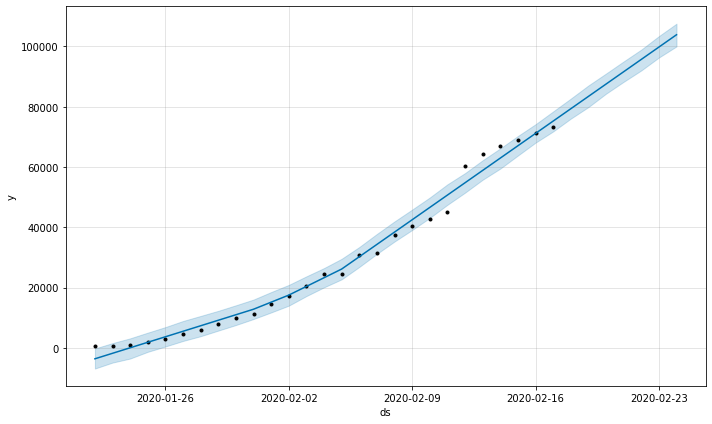

In [43]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(data_confirmed)

future = model.make_future_dataframe(periods=7, freq='D')
forecast = model.predict(future)

_ = model.plot(forecast)